In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import uproot

In [3]:
f_nuwro = uproot.open('sbnd_extracted_nuwro_newgeo.root')
f_genie = uproot.open('sbnd_extracted_genie.root')

In [4]:
selection = 'nu_vtx_x > -200 and nu_vtx_x < 200 '
selection += 'and nu_vtx_y > -200 and nu_vtx_y < 200 '
selection += 'and nu_vtx_z > 0 and nu_vtx_z < 500 '

selection += 'and nu_pdg == 14 '

selection += 'and ccnc == 0 '

In [5]:
df_raw = {}
df_raw['nuwro'] = f_nuwro['extractor/tree'].pandas.df()
df_raw['genie'] = f_genie['extractor/tree'].pandas.df()

df = {}
df['nuwro'] = f_nuwro['extractor/tree'].pandas.df().query(selection)
df['genie'] = f_genie['extractor/tree'].pandas.df().query(selection)

In [6]:
df['nuwro'].head()

,run,subrun,event,nu_pdg,ccnc,nu_e,nu_vtx_x,nu_vtx_y,nu_vtx_z,lep_p,lep_costheta
entry,,,,,,,,,,,
6,1,0,7,14,0,1.098180,-28.0642,71.8870,18.0593,0.563859,0.517500
13,1,0,14,14,0,1.103420,156.8380,-44.4535,419.9380,0.225136,0.356305
15,1,0,16,14,0,1.028660,185.8140,10.9360,381.7030,0.804062,0.915522
21,1,0,22,14,0,1.064950,113.6820,-136.3040,348.4770,0.757322,0.995603
24,1,0,25,14,0,0.912553,29.4974,-131.6070,470.3950,0.765190,0.834431


In [7]:
var_name = {
    'nu_e':         r'True Neutrino Energy [GeV]',
    'lep_p':        r'True Lepton Momentum [GeV]',
    'lep_costheta': r'True Lepton $\cos\theta$' 
    }
var_range = {
    'nu_e':         [0, 3],
    'lep_p':        [0, 2],
    'lep_costheta': [-1, 1] 
    }

In [8]:
from tools import *

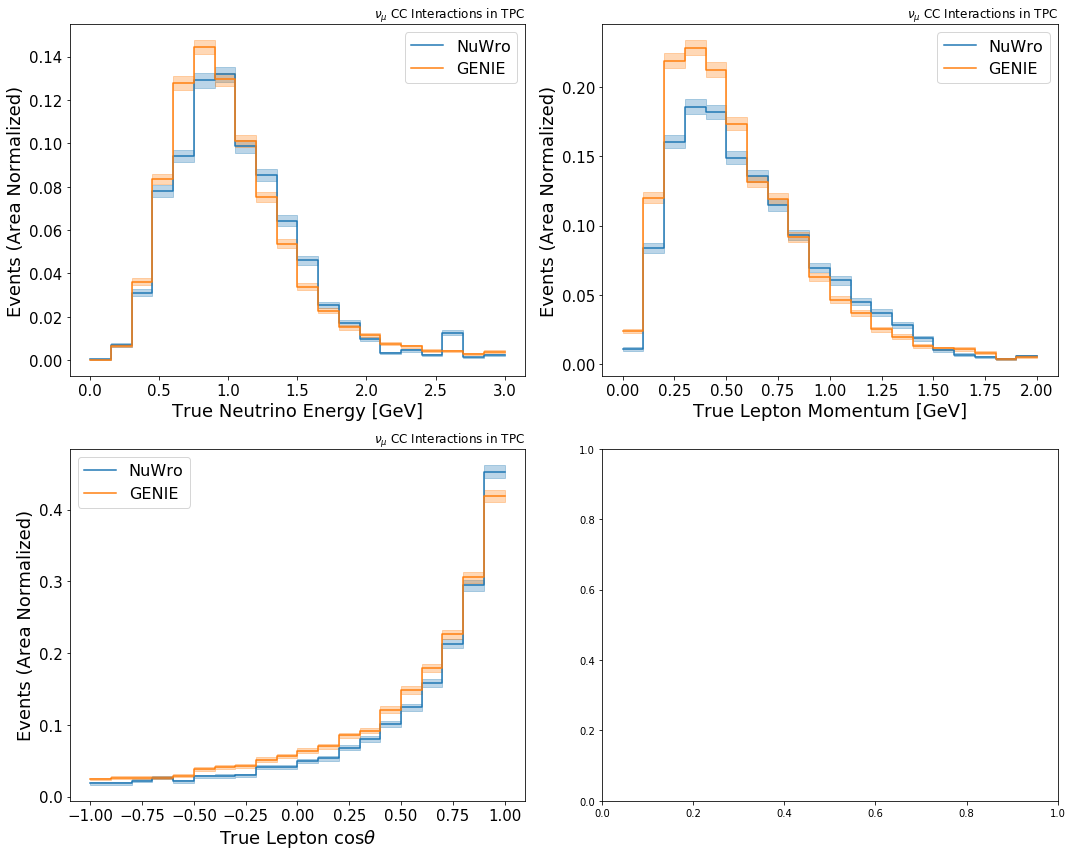

In [9]:
ncols = 2
nrows = 2
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15,12))

row = -1
column = 0
for i, var in enumerate(['nu_e', 'lep_p', 'lep_costheta']):
    column = i % ncols
    if (i % ncols == 0): 
        row += 1

    data = [df['nuwro'][var], df['genie'][var]]
    labels = ['NuWro', 'GENIE']
    weights = [[1.] * len(df['nuwro'][var]), [1.] * len(df['genie'][var])]
    plot_histogram(ax[row][column], data=data, option='simple', weights=weights, n_bins=20, limits=var_range[var], label=labels, normed=True)

    ax[row][column].legend(fontsize=16, loc='best')
    ax[row][column].set_xlabel(var_name[var],fontsize=18)
    ax[row][column].set_ylabel(r'Events (Area Normalized)',fontsize=18)
    ax[row][column].set_title(r'$\nu_\mu$ CC Interactions in TPC', loc='right', fontsize=12)
    ax[row][column].tick_params(labelsize=15)
#     ax[row][column].grid(True)

plt.savefig('nuwro_genie_numu_cc_tpc_comparison.pdf')
plt.tight_layout()

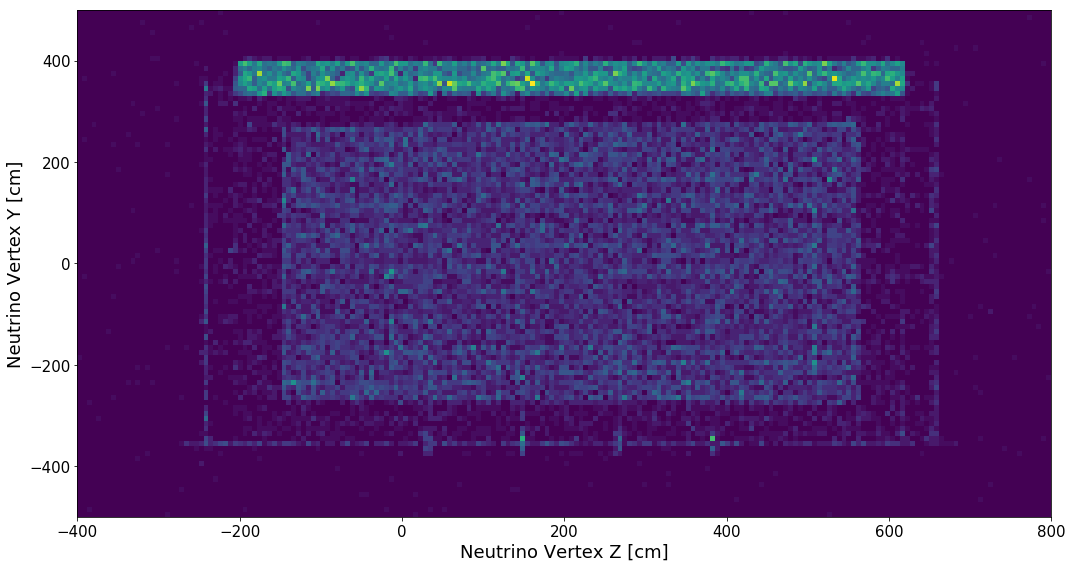

In [23]:
ncols = 1
nrows = 1
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15,8))

data_y = df_raw['nuwro']['nu_vtx_y']
data_x = df_raw['nuwro']['nu_vtx_z']

plt.hist2d(x=data_x, y=data_y, bins=[200, 100], range=[[-400, 800], [-500, 500]])

ax.set_xlabel(r'Neutrino Vertex Z [cm]',fontsize=18)
ax.set_ylabel(r'Neutrino Vertex Y [cm]',fontsize=18)
ax.tick_params(labelsize=15)
plt.colorbar(h[3], ax=ax)

plt.savefig('nuwro_genie_nuvtx_y_z.pdf')
plt.tight_layout()

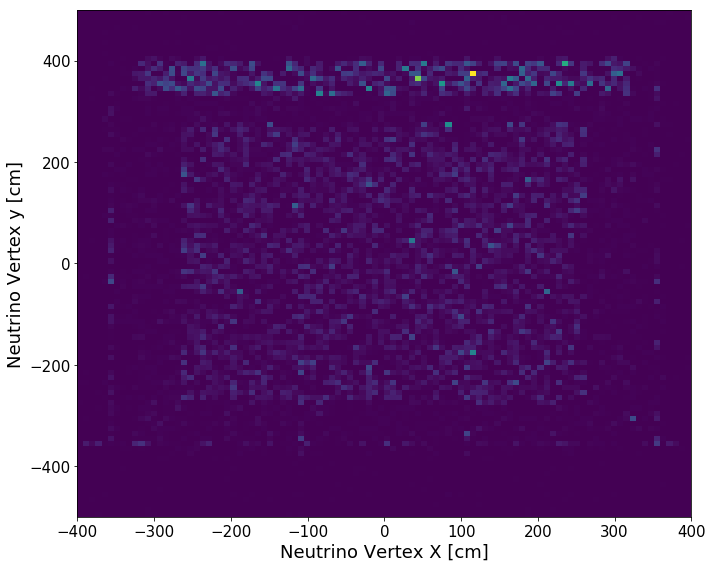

In [20]:
ncols = 1
nrows = 1
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(10,8))

data_y = df_raw['nuwro']['nu_vtx_y']
data_x = df_raw['nuwro']['nu_vtx_x']

plt.hist2d(x=data_x, y=data_y, bins=[100, 100], range=[[-400, 400], [-500, 500]])

ax.set_xlabel(r'Neutrino Vertex X [cm]',fontsize=18)
ax.set_ylabel(r'Neutrino Vertex Y [cm]',fontsize=18)
ax.tick_params(labelsize=15)

plt.savefig('nuwro_genie_nuvtx_y_x.pdf')
plt.tight_layout()